## Future Sales Prediction 

In [1]:
# Importing the Dependencies

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_excel("/content/Future Sales Prediction.xlsx")
print(data.head())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [3]:
#data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/advertising.csv")
#print(data.head())

In [4]:
# Checking for the Null values

print(data.isnull().sum())

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [5]:
# visualizing the relationship between the amount spent on advertising on TV and units sold

import plotly.express as px
import plotly.graph_objects as go
figure = px.scatter(data_frame = data, x="Sales", 
                    y= "TV", size="TV", trendline="ols")
figure.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
# Visualizing the relationship between the amount spent on advertising on newspapers and units sold

figure = px.scatter(data_frame = data, x= "Sales", 
                    y="Newspaper", size="Newspaper", trendline="ols")
figure.show()

In [7]:
# Visualizing the relationship between the amount spent on advertising on radio and units sold

figure = px.scatter(data_frame=data, x="Sales",
                    y="Radio", size="Radio", trendline="ols")
figure.show()

Sales        1.000000
TV           0.901208
Radio        0.349631
Newspaper    0.157960
Name: Sales, dtype: float64


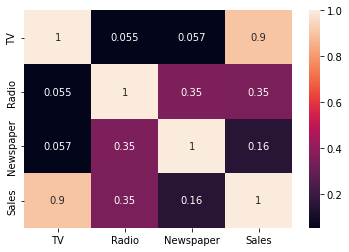

In [10]:
# Correlation of all the columns with the sales column
import seaborn as sns

correlation = data.corr()
print(correlation["Sales"].sort_values(ascending=False))
sns.heatmap(correlation, annot=True)

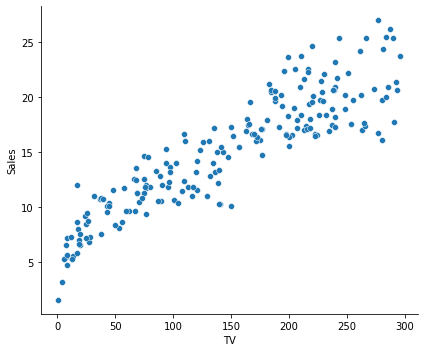

In [11]:
sns.relplot(data=data, x="TV", y="Sales", aspect=1.2)

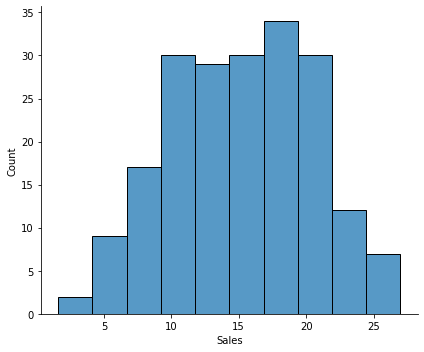

In [12]:
sns.displot(data=data, x="Sales", aspect=1.2)

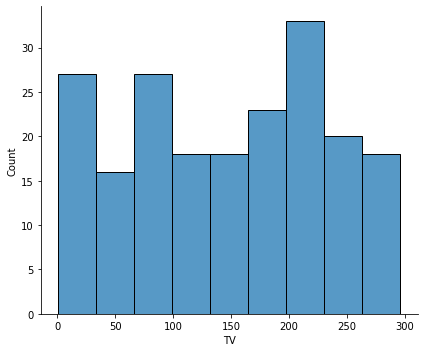

In [13]:
sns.displot(data=data, x="TV", aspect=1.2)

## Future Sales Prediction Model

In [30]:
# Splitting the data into training and test sets

X = np.array(data[["TV", "Radio"]])
y = np.array(data["Sales"])
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2,
                                                random_state=42)

In [31]:
for i in [Xtrain, Xtest, ytrain, ytest]:
  print(i.shape)

(160, 2)
(40, 2)
(160,)
(40,)


In [32]:
# Training the model to predict future Sales

lr = LinearRegression()
lr.fit(Xtrain, ytrain)
print("Train Score: ", lr.score(Xtrain, ytrain))
print("Test score: ", lr.score(Xtest, ytest))

Train Score:  0.8998966262779063
Test score:  0.907879780262465


In [33]:
y_pred = lr.predict(Xtest)

In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print(f"r2 score: {r2_score(ytest, y_pred)}")
print(f"MSE: {mean_squared_error(ytest, y_pred)}")
print(f"MAE: {mean_absolute_error(ytest, y_pred)}")

r2 score: 0.907879780262465
MSE: 2.8466161221315427
MAE: 1.2670422434730486


In [35]:
# feature = [[TV, Radio, Newspaper]]

features = np.array([[230.1, 37.8]])
print(lr.predict(features))

[21.2366643]


# Pickle

In [36]:
# Importing Pickle

import pickle

In [37]:
model = pickle.dump(lr, open("Model_Sales.pkl", "wb"))

In [38]:
model = pickle.load(open("Model_Sales.pkl", "rb"))

In [40]:
model.predict([[230, 36]])

array([21.04534982])